In [1]:
import numpy as np
import pandas as pd
import read
import spatialdata
import math
import pysal.lib as ps
from mgwr.gwr import GWR

导入数据

In [2]:
cor_matrix = read.read_txt(filename='/Users/zhujun/Documents/毕业设计/SHA/SHAcode/data/cell_locations/cortex_svz_centroids_coord.txt',delimiter='\t', column_names=[0])

In [3]:
expression_matrix = read.read_txt(filename='/Users/zhujun/Documents/毕业设计/SHA/SHAcode/data/count_matrix/cortex_svz_expression.txt', delimiter=' ', column_names=[0])

In [4]:
ann_matrix=read.read_txt(filename='/Users/zhujun/Documents/毕业设计/SHA/SHAcode/data/cell_locations/cortex_svz_centroids_annot.txt', delimiter='\t', column_names=[0])

In [6]:
expression_matrix

,cell_1,cell_2,cell_3,cell_4,cell_5,cell_6,cell_7,cell_8,cell_9,cell_10,...,cell_904,cell_905,cell_906,cell_907,cell_908,cell_909,cell_910,cell_911,cell_912,cell_913
1700022a21rik,3,1,0,0,0,1,1,0,0,0,...,1,0,2,0,0,0,0,0,0,0
1700025g04rik,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4933401b06rik,2,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5830417i10rik,0,0,1,0,1,0,1,1,0,0,...,0,0,0,1,0,2,0,0,0,0
9330102e08rik,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pde6b,0,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
Zp1,0,0,1,0,0,0,3,0,0,0,...,0,0,0,0,0,1,0,0,0,0
Dlx4,0,0,0,0,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
Opn1sw,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
def gene_regulate_gwr(coor,y,x,bw,fixed,kernel):
    

In [30]:
coords = list(zip(cor_matrix['X'][:118], cor_matrix['Y'][:118]))

In [36]:
y = np.array(expression_matrix.loc['Zp1'][:118]).reshape((-1,1))

In [37]:
Ace = np.array(expression_matrix.loc['Ace'][:118]).reshape((-1,1))

In [38]:
Acox3 = np.array(expression_matrix.loc['Acox3'][:118]).reshape((-1,1))

In [41]:
X = np.hstack([Ace, Acox3])

In [44]:
model = GWR(coords, y, X, bw=90.000, fixed=False, kernel='bisquare')

In [45]:
results = model.fit()

In [46]:
results.summary()

Model type                                                         Gaussian
Number of observations:                                                 118
Number of covariates:                                                     3

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                             32.806
Log-likelihood:                                                     -91.910
AIC:                                                                189.821
AICc:                                                               192.175
BIC:                                                               -515.823
R2:                                                                   0.029
Adj. R2:                                                              0.012

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

In [47]:
param = results.params[:,0]

In [51]:
cm = plt.cm.get_cmap('RdYlBu')

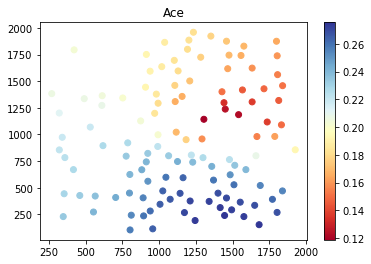

In [55]:
sc = plt.scatter(cor_matrix['X'][:118], cor_matrix['Y'][:118], c=param, cmap=cm)
plt.colorbar(sc)
plt.title("Ace")
plt.show()

In [58]:
param2 = results.params[:,1]

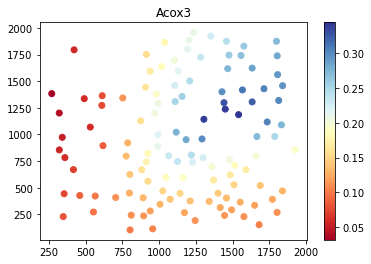

In [59]:
sc = plt.scatter(cor_matrix['X'][:118], cor_matrix['Y'][:118], c=param2, cmap=cm)
plt.colorbar(sc)
plt.title("Acox3")
plt.show()